In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)
# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import os


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_buyers_201910.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_buyers_201911.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_buyers_201912_202001.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_buyers_202002.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_buyers_202003.csv')
df_all = pd.concat([df1, df2, df3, df4, df5])
df_all

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,month
0,2019-10-13 13:25:29+00:00,purchase,5100443,2053013553341792533,electronics.clocks,garmin,340.59,303160429,8957377b-66b3-4661-ae91-5c2b5e29fd0e,2019-10-13,13.0,electronics,clocks,NaN,NaN,NaN
1,2019-10-09 15:51:08+00:00,purchase,17301479,2053013553853497655,NaN,NaN,29.89,371877401,d3103132-d38a-4399-9404-f99d03d243d0,2019-10-09,15.0,NaN,NaN,NaN,NaN,NaN
2,2019-10-18 11:19:59+00:00,purchase,2501816,2053013564003713919,appliances.kitchen.oven,artel,41.44,384989212,7472f245-e885-4c5e-b3b1-476a7b19b508,2019-10-18,11.0,appliances,kitchen,oven,NaN,NaN
3,2019-10-26 14:05:39+00:00,purchase,10700971,2053013561277416167,NaN,NaN,20.59,387300134,51d42df3-8ba8-493f-b780-41f09a74be28,2019-10-26,14.0,NaN,NaN,NaN,NaN,NaN
4,2019-10-24 17:54:48+00:00,purchase,12718429,2053013553559896355,NaN,cordiant,48.14,396222093,0ec20848-b6c5-41b5-bba8-132be4461915,2019-10-24,17.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275626,2020-03-31 23:49:41+00:00,purchase,1004835,2232732093077520756,construction.tools.light,samsung,199.87,588488017,84395d1c-4349-49e4-9581-94f63cfb034f,2020-03-31,23.0,construction,tools,light,NaN,2020-03
275627,2020-03-31 23:54:30+00:00,purchase,100062704,2053013554658804075,electronics.audio.headphone,asus,812.12,624142677,8501ed7e-a926-450e-87ff-da17ce20f14f,2020-03-31,23.0,electronics,audio,headphone,NaN,2020-03
275628,2020-03-31 23:55:08+00:00,purchase,1003319,2232732093077520756,construction.tools.light,apple,900.64,619860269,ea2efefc-95ea-49ce-9250-fef572c53b44,2020-03-31,23.0,construction,tools,light,NaN,2020-03
275629,2020-03-31 23:58:19+00:00,purchase,100049773,2232732106860003995,NaN,NaN,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23.0,NaN,NaN,NaN,NaN,2020-03


In [ ]:
df_all.to_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/one_time_buyers_all.csv', index=False)

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2019-Oct.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2019-Nov.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2019-Dec.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2020-Jan.csv')
df_5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2020-Feb.csv')
df_6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/2020-Mar.csv')

In [ ]:
df_total = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])
df_total

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
56341236,2020-03-31 23:59:55 UTC,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24
56341237,2020-03-31 23:59:55 UTC,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357
56341238,2020-03-31 23:59:56 UTC,view,2601488,2232732101835227701,NaN,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1
56341239,2020-03-31 23:59:56 UTC,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789


In [ ]:
# datetime 형식으로 되어 있어야 함
df_total['event_time'] = pd.to_datetime(df_total['event_time'])

# event_date를 datetime으로 변환 (안정성 확보)
df_total['event_date'] = pd.to_datetime(df_total['event_time'].dt.date)

# 시간 컬럼 생성 (00시 단위까지만)
df_total['event_hour'] = df_total['event_time'].dt.hour

df_total

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0
...,...,...,...,...,...,...,...,...,...,...,...
56341236,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23
56341237,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23
56341238,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,NaN,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23
56341239,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23


In [ ]:
# .으로 나눈 컬럼 생성 (최대 4단계까지 가정)
category_split = df_total['category_code'].str.split('.', expand=True)

# 새로운 컬럼 이름 지정
category_split.columns = ['category_lvl1', 'category_lvl2', 'category_lvl3', 'category_lvl4']

# 기존 df에 병합
df = pd.concat([df_total, category_split], axis=1)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,NaN,NaN,NaN,NaN
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,appliances,environment,water_heater,None
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0,furniture,living_room,sofa,None
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0,computers,notebook,None,None
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,electronics,smartphone,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56341236,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23,construction,tools,light,None
56341237,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None
56341238,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,NaN,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,NaN,NaN,NaN,NaN
56341239,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None


# 카테고리 평균 구매율 Top5 추출해서 저장하기

### 카테고리별 평균 구매율

In [ ]:
# 1. purchase 이벤트만 필터링
purchase_df = df[df['event_type'] == 'purchase']

# 2. category_lvl1 기준으로 구매 수 계산
cat_lvl1_counts = purchase_df['category_lvl1'].value_counts().reset_index()
cat_lvl1_counts.columns = ['category_lvl1', 'purchase_count']

# 3. 전체 구매 중 각 카테고리 비율 계산
total_purchase = cat_lvl1_counts['purchase_count'].sum()
cat_lvl1_counts['purchase_ratio'] = cat_lvl1_counts['purchase_count'] / total_purchase

# 4. 구매 비중 기준 정렬
cat_lvl1_counts = cat_lvl1_counts.sort_values(by='purchase_ratio', ascending=False)

# 결과 확인
display(cat_lvl1_counts)


,category_lvl1,purchase_count,purchase_ratio
0,construction,2046734,0.394327
1,electronics,1256645,0.242107
2,appliances,747197,0.143956
3,apparel,374525,0.072157
4,sport,267283,0.051495
5,computers,181245,0.034919
6,furniture,153363,0.029547
7,kids,73564,0.014173
8,auto,48828,0.009407
9,accessories,30412,0.005859


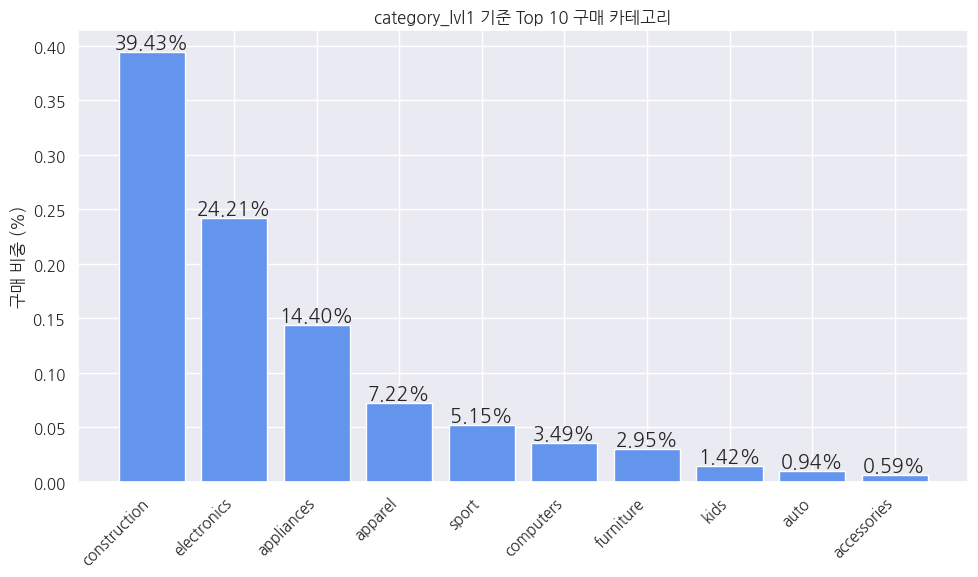

In [ ]:
top_n = 10
top_cat = cat_lvl1_counts.head(top_n)

plt.figure(figsize=(10,6))
bars = plt.bar(top_cat['category_lvl1'], top_cat['purchase_ratio'], color='cornflowerblue')
plt.title(f'category_lvl1 기준 Top {top_n} 구매 카테고리')
plt.ylabel('구매 비중 (%)')
plt.xticks(rotation=45, ha='right')

# 바 위에 % 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,2019-10-01,0,NaN,NaN,NaN,NaN
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,appliances,environment,water_heater,None
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0,furniture,living_room,sofa,None
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01,0,computers,notebook,None,None
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,electronics,smartphone,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56341236,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23,construction,tools,light,None
56341237,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None
56341238,2020-03-31 23:59:56+00:00,view,2601488,2232732101835227701,NaN,darina,167.29,523607693,6836d271-ef67-42dc-8756-4ef103e4fbf1,2020-03-31,23,NaN,NaN,NaN,NaN
56341239,2020-03-31 23:59:56+00:00,view,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total_col.csv')
df2

In [ ]:
# pandas로 Parquet 저장
df2.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total_col.parquet', index=False)
df.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total.parquet', index=False)

# 다시 불러올 땐 빠르고 메모리 적게 먹음
# df = pd.read_parquet('file.parquet')

### top5 카테고리만 들어간 파일 저장

In [ ]:
# 대상 카테고리 리스트
target_categories = ['construction', 'electronics', 'appliances', 'apparel', 'sport']

# 해당 카테고리 필터링 (category_lvl1 컬럼 기준)
filtered_df = df[df['category_lvl1'].isin(target_categories)].copy()
filtered_df['category_lvl1'].value_counts()

In [ ]:
# Parquet 형식으로 저장 (압축 적용: optional)
filtered_df.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total_col_re.parquet', index=False, compression='snappy')

print(f"✔️ 저장 완료! 필터링된 행 수: {len(filtered_df):,}개")

In [ ]:
test = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/total_col_re.parquet의 사본')
test

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01,0,appliances,environment,water_heater,None
1,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01,0,electronics,smartphone,None,None
2,2019-10-01 00:00:10+00:00,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01,0,apparel,shoes,keds,None
3,2019-10-01 00:00:11+00:00,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb,2019-10-01,0,electronics,smartphone,None,None
4,2019-10-01 00:00:11+00:00,view,2900536,2053013554776244595,appliances.kitchen.microwave,elenberg,51.46,555158050,b5bdd0b3-4ca2-4c55-939e-9ce44bb50abd,2019-10-01,0,appliances,kitchen,microwave,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237566364,2020-03-31 23:59:54+00:00,view,8700399,2232732089587859740,appliances.personal.hair_cutter,maxwell,17.76,597751823,54a07446-6197-4734-a71f-3ef7efb2b5a0,2020-03-31,23,appliances,personal,hair_cutter,None
237566365,2020-03-31 23:59:55+00:00,cart,5100375,2232732103101907535,electronics.clocks,xiaomi,84.94,635164513,c40d1b96-90aa-4cee-b9aa-9475d9c4f17f,2020-03-31,23,electronics,clocks,None,None
237566366,2020-03-31 23:59:55+00:00,view,1005212,2232732093077520756,construction.tools.light,samsung,178.12,516506125,cdd4bce1-ff8c-49c3-92b3-0c7a209c8b24,2020-03-31,23,construction,tools,light,None
237566367,2020-03-31 23:59:55+00:00,view,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None


In [ ]:
# 1. cart 또는 purchase 필터링
filtered_df = test[test['event_type'].isin(['cart', 'purchase'])]
filtered_df
# 2. Parquet 형식으로 저장
filtered_df.to_parquet('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/cart_purchase_only.parquet', index=False)


In [ ]:
filtered_df['category_lvl1'].value_counts()

,count
category_lvl1,
construction,7090597
electronics,4428961
appliances,2891651
apparel,1577830
sport,1086514


In [ ]:
filtered_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
97,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2019-10-01,0,electronics,smartphone,None,None
175,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01,0,electronics,smartphone,None,None
313,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,2019-10-01,0,electronics,audio,headphone,None
315,2019-10-01 00:09:33+00:00,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,0,electronics,smartphone,None,None
322,2019-10-01 00:09:54+00:00,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01,0,electronics,audio,headphone,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237566318,2020-03-31 23:59:35+00:00,cart,100011103,2053013554658804075,electronics.audio.headphone,acer,385.57,522177285,902aa3e5-957a-49e4-8638-ddbbe895808a,2020-03-31,23,electronics,audio,headphone,None
237566320,2020-03-31 23:59:35+00:00,cart,8700232,2232732089587859740,appliances.personal.hair_cutter,vitek,38.59,571822727,dabea208-878f-45bf-9865-fca43b201874,2020-03-31,23,appliances,personal,hair_cutter,None
237566336,2020-03-31 23:59:44+00:00,cart,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None
237566352,2020-03-31 23:59:50+00:00,cart,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None
